Análisis Deserción

1. Cargar y Explorar los Datos:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, col, when, count, lit

In [2]:
ruta = 'C:/Users/omarc/OneDrive/Escritorio/Proyectos VSC/OmarCano/Track Analítico UNI/05_Datos/02_Datos_Procesados'
ruta2 = 'C:/Users/omarc/OneDrive/Escritorio/Proyectos VSC/OmarCano/Track Analítico UNI/05_Datos/01_Datos_Crudos'

desertados_df = pd.read_csv(f'{ruta}/um_desercion.csv')
cepre_df = pd.read_csv(f'{ruta}/hm_cepre_uni_limpio.csv')
admisiones_df = pd.read_csv(f'{ruta}/hm_admisiones_uni_limpio.csv')
matriculados_df = pd.read_csv(f'{ruta}/hm_matriculados_uni_limpio.csv')
personas_df = pd.read_csv(f'{ruta2}/hm_personas_demo.csv')
colegios_df = pd.read_csv(f'{ruta2}/hm_colegios.csv')

In [3]:
matriculados_df['CodYear'] = matriculados_df['ANIO'] * 10 + matriculados_df['PERIODO']
matriculados_df = matriculados_df.sort_values(by=['IDHASH', 'CodYear'])

In [4]:
merged_df = personas_df.merge(desertados_df, on='IDHASH', how='left')
merged_df = merged_df.merge(colegios_df, left_on='COLEGIO', right_on='COLEGIO', how='left')
columns_of_interest = [
    'IDHASH', 'COLEGIO', 'COLEGIO_ANIO_EGRESO', 'ANIO_NACIMIENTO', 'NACIMIENTO_PAIS',
    'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST', 'SEXO', 'Deserción',
    'Detalle'
]
merged_df = merged_df[columns_of_interest]

2. Análisis Descriptivo

In [5]:
descriptive_stats = merged_df.describe(include='all')
missing_data = merged_df.isnull().sum()

print("Estadísticas Descriptivas:")
print(descriptive_stats)

print("\nDatos Faltantes:")
print(missing_data)


Estadísticas Descriptivas:
                                                   IDHASH COLEGIO  \
count                                              127621  127621   
unique                                              54444   10192   
top     A25F0146E30D7C002B21E39A3D378C23A5AF7B36542A75...       0   
freq                                                   46   16248   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   

        COLEGIO_ANIO_EGRESO  ANIO_NACIMIENTO NACIMIENTO_PAIS NACIMIENTO_DEPA  \
count         127621.000000    127621.000000          127621    

3. Visualizaciones:


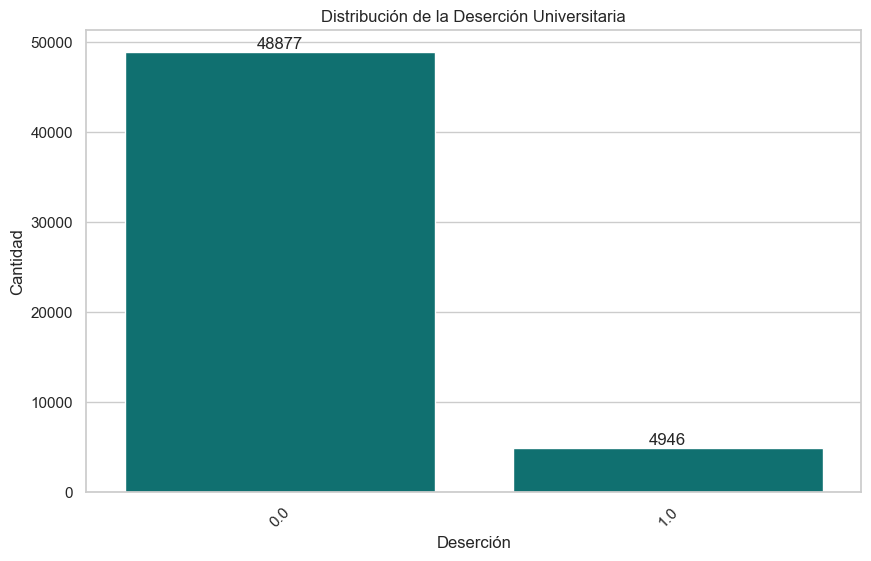

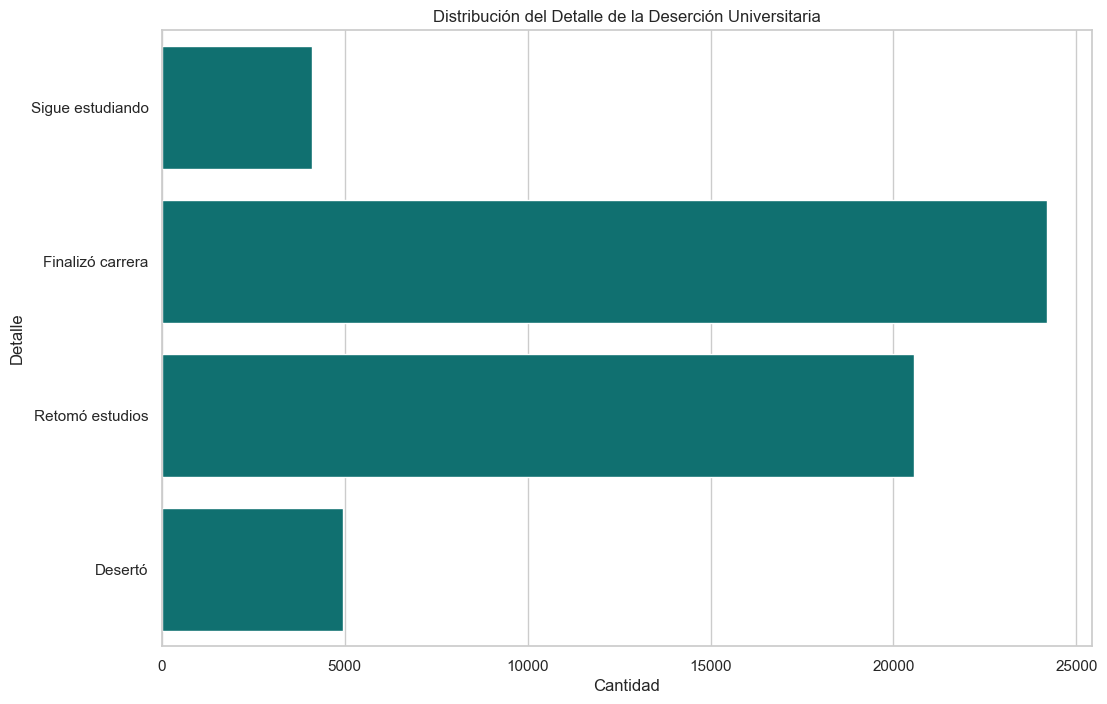

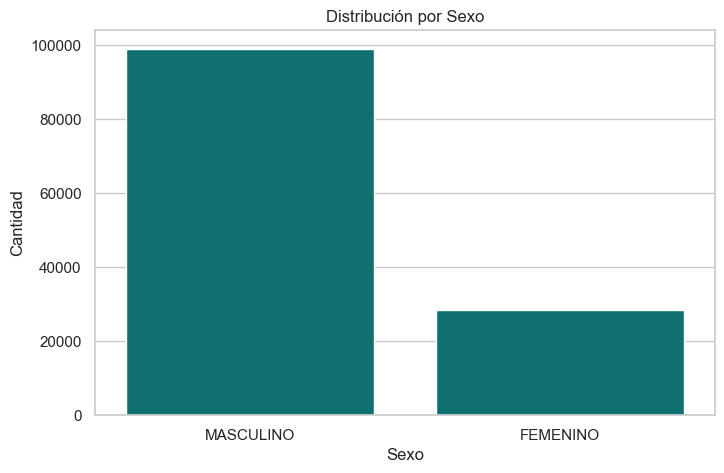

In [7]:
sns.set(style="whitegrid")

# Distribución de la deserción
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=merged_df, x='Deserción', color='teal') 
for container in ax.containers:
    ax.bar_label(container)

plt.title('Distribución de la Deserción Universitaria')
plt.xlabel('Deserción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Distribución del detalle de deserción
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, y='Detalle', color='teal')
plt.title('Distribución del Detalle de la Deserción Universitaria')
plt.xlabel('Cantidad')
plt.ylabel('Detalle')
plt.show()

# Distribución por sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='SEXO', color='teal')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()